# CS 229 Problem Set 2
## 1. Logistic Regression: Training stability
## Question 1. (a)

The most notable difference in training is that dataset B is hard to converge.


## Question 1. (b)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from lr_debug import *

In [2]:
Xa, Ya = load_data('data_a.txt')
norms = []
thetas = []
norms, thetas = logistic_regression(Xa, Ya)

Finished 10000 iterations; Diff theta: 7.226491864936692e-07; theta: [-20.81394174  21.45250215  19.85155266]; Grad: [ 4.15154546e-08 -4.27822247e-08 -4.08456455e-08]
Finished 20000 iterations; Diff theta: 5.3329785269148335e-11; theta: [-20.81437785  21.45295156  19.85198173]; Grad: [ 3.06366902e-12 -3.15717192e-12 -3.01432011e-12]
Finished 30000 iterations; Diff theta: 6.153480596427404e-15; theta: [-20.81437788  21.45295159  19.85198176]; Grad: [ 1.91127606e-16 -2.90264320e-16 -2.01301257e-16]
Converged in 30395 iterations


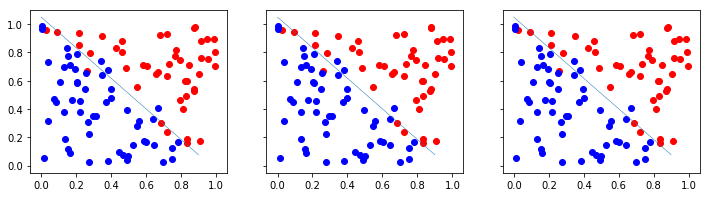

In [3]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 3))
axes = axes.ravel()

for k, theta in enumerate(thetas):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    
    ax.scatter(Xa[np.where(Ya==1)][:,1], Xa[np.where(Ya==1)][:,2], color='red')
    ax.scatter(Xa[np.where(Ya==-1)][:,1], Xa[np.where(Ya==-1)][:,2], color='blue')

In [4]:
Xb, Yb = load_data('data_b.txt')
norms = []
thetas = []
norms, thetas = logistic_regression(Xb, Yb)

Finished 10000 iterations; Diff theta: 0.003361039469518825; theta: [-52.74109217  52.92982273  52.69691453]; Grad: [ 0.00019399 -0.00019355 -0.00019461]
Finished 20000 iterations; Diff theta: 0.002173205351041188; theta: [-68.10040977  68.26496086  68.09888223]; Grad: [ 0.00012541 -0.00012529 -0.0001257 ]
Finished 30000 iterations; Diff theta: 0.0016644896054955345; theta: [-79.01759142  79.17745526  79.03755803]; Grad: [ 9.60445104e-05 -9.60553587e-05 -9.61981110e-05]
Finished 40000 iterations; Diff theta: 0.00137040952812708; theta: [-87.70771189  87.87276307  87.73897393]; Grad: [ 7.90651647e-05 -7.91523106e-05 -7.91443884e-05]
Finished 50000 iterations; Diff theta: 0.0011758957242939641; theta: [-95.01838735  95.1948202   95.0551918 ]; Grad: [ 6.78328688e-05 -6.79700947e-05 -6.78680755e-05]
Finished 60000 iterations; Diff theta: 0.0010366393703263115; theta: [-101.37921493  101.57119731  101.41805781]; Grad: [ 5.97905761e-05 -5.99622968e-05 -5.97981756e-05]


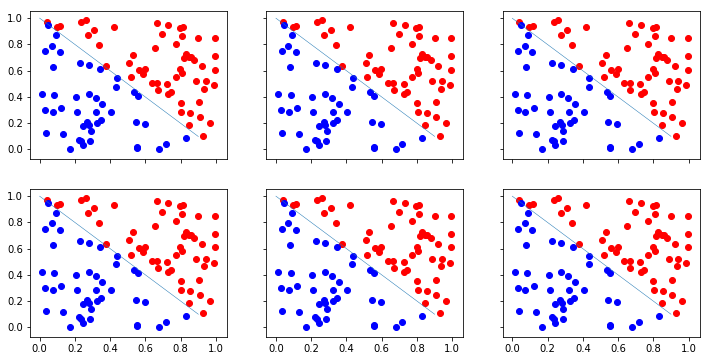

In [5]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6))
axes = axes.ravel()

for k, theta in enumerate(thetas[:6]):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    
    ax.scatter(Xb[np.where(Yb==1)][:,1], Xb[np.where(Yb==1)][:,2], color='red')
    ax.scatter(Xb[np.where(Yb==-1)][:,1], Xb[np.where(Yb==-1)][:,2], color='blue')

It seems that dataset B is linear separable however it is not for dataset A.

Logistic regression attempts to minimize the log-loss:
$$
J(\theta) = \frac{1}{m}\sum_{i=1}^m{\log{(1+e^{-y^{(i)}\theta^Tx^{(i)}})}}
$$

It is easy to see that $\min{J(\theta)}=1$ for $||\theta|| \rightarrow \infty$. So, if dataset is linearly separable, $||\theta||$ will be arbitrarily large and this will decrease the loss.

It will not happen when the dataset is not linearly separable: there are always **misclassified** data points.

## Question 1. (c)

* Q: Using a different constant learning rate. 

    A: **No**, it is a scaling problem, changing the learning rate would not solve.

* Q: Decreasing the learning rate over time.

    A: **No**, it is a scaling problem and irrelevant to learning rate.

* Q: Adding a regularization term $||\theta||$ to the loss function.

    A: **Yes**, it will limit parameters' scale.
    
* Q: Linear scaling of the input features.

    A: **No**,  linear transformation still make  data linearly separable.

* Q: Adding zero-mean Gaussian noise to the training data or labels.

    A: **Maybe**, noise could work but it is not a robust way.

## Question 1. (d)

Support Vector Machines maximize the geometric margin. In the case of a linearly separable dataset, SVM would maximize the distance between the separator and the closest data point, such that all data points are correctly classified. An SVM would work on datasets such as B and can easily find support vectors.